# Insurance Charges Prediction — Linear Regression From Scratch


## 1. Introduction

**Problem:**  
Predicting insurance charges based on personal information like age, sex, BMI, smoking habits, children, and region.

**Why is it interesting?**  
Estimating medical costs helps individuals and insurance companies plan better and manage risk. Building this model from scratch showcases core ML math and implementation skills.


## 2. Dataset Overview

- Source: Kaggle ([insurance.csv](https://www.kaggle.com/mirichoi0218/insurance))  
- Number of rows: 1338
- Features:

| Column      | Description                  |
|-------------|------------------------------|
| age         | Age of the policyholder       |
| sex         | Gender (male/female)          |
| bmi         | Body Mass Index               |
| children    | Number of children            |
| smoker      | Smoking status (yes/no)       |
| region      | Residential area              |
| charges     | Insurance charges (target)    |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
insurance_df = pd.read_csv("insurance.csv")
print(f"Dataset shape: {insurance_df.shape}")
insurance_df.head()


Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Data Preprocessing

- Encode categorical variables (sex, smoker) as numeric  
- One-hot encode region (drop first to avoid multicollinearity)  
- Standardize features for better gradient descent performance


In [2]:
# Encode categorical variables
insurance_df["sex"] = insurance_df["sex"].str.strip().str.lower().map({"male": 0, "female": 1})
insurance_df["smoker"] = insurance_df["smoker"].str.strip().str.lower().map({"no": 0, "yes": 1})

# One-hot encode 'region' column
insurance_df = pd.get_dummies(insurance_df, columns=["region"], drop_first=True)

# Convert any bool columns to int (if any)
bool_cols = insurance_df.select_dtypes(include='bool').columns
insurance_df[bool_cols] = insurance_df[bool_cols].astype(int)

insurance_df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [3]:
# Separate features and target
X = insurance_df.drop("charges", axis=1).values
y = insurance_df["charges"].values.reshape(-1, 1)

# Standardize features
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X_standardized = (X - means) / stds


## 4. Model Building 

- Add bias term  
- Define hypothesis (prediction) function  
- Define cost function (Mean Squared Error)  
- Implement gradient descent algorithm


In [4]:
# Add bias term (column of ones)
m = X_standardized.shape[0]
X_bias = np.hstack((np.ones((m, 1)), X_standardized))

# Hypothesis function
def predict(X, theta):
    return X @ theta

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        gradients = (1 / m) * (X.T @ errors)
        theta = theta - learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history


## 5. Training

Train the model using gradient descent and plot the cost function to observe learning.


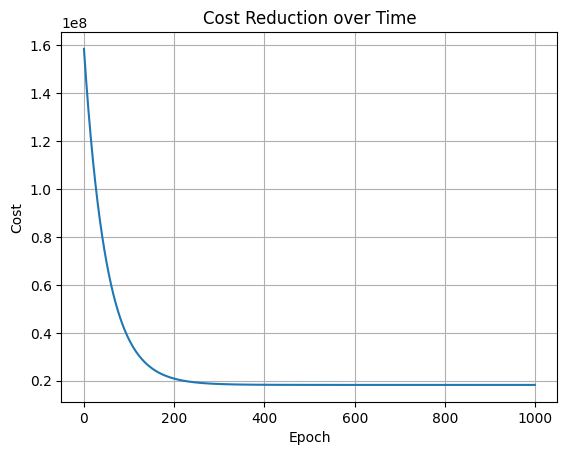

In [5]:
n = X_bias.shape[1]
theta = np.zeros((n, 1))
learning_rate = 0.01
epochs = 1000

theta, cost_history = gradient_descent(X_bias, y, theta, learning_rate, epochs)

plt.plot(cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Reduction over Time')
plt.grid(True)
plt.show()


## 6. Model Evaluation

Visualize how predicted charges compare with actual charges.


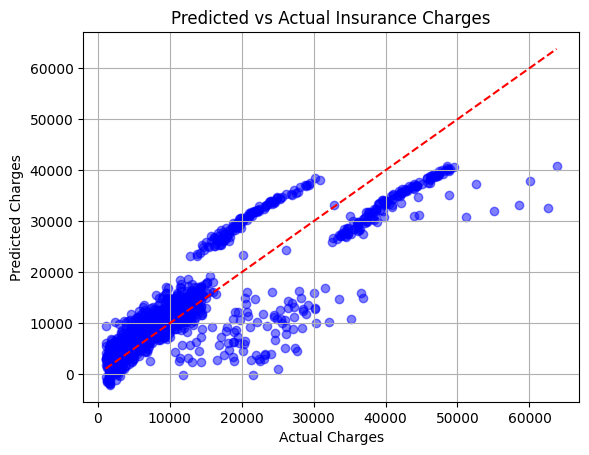

In [6]:
predictions = predict(X_bias, theta)

plt.scatter(y, predictions, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Insurance Charges')
plt.grid(True)
plt.show()


## 7. Conclusion

- **Summary:**  
  The linear regression model implemented from scratch predicts insurance charges reasonably well.

- **Limitations:**  
  Assumes linear relationships; may not capture complex patterns.

- **Future Improvements:**  
  - Include train/test split for validation  
  - Try regularization to reduce overfitting  
  - Explore non-linear models or interaction terms
